<a href="https://colab.research.google.com/github/Phavour-EBEN/Deep-Learning-with-Udacity/blob/main/Improved_Cats_and_Dogs_images_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [25]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
# _URL = '/content/sample_data/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

In [27]:
# listing all the directories
zip_dir_based = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

.
./.config
./.config/configurations
./.config/logs
./.config/logs/2024.10.10
./sample_data


In [28]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [29]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


In [30]:
image_size = 150
batch_size = 100

Data Augmentation

In [31]:
def plot_images(images_arr):
  fig, axes = plt.subplots(1, 5, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    plt.tight_layout()
  plt.show

In [32]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(image_size, image_size),
                                               class_mode='binary')

Found 2000 images belonging to 2 classes.


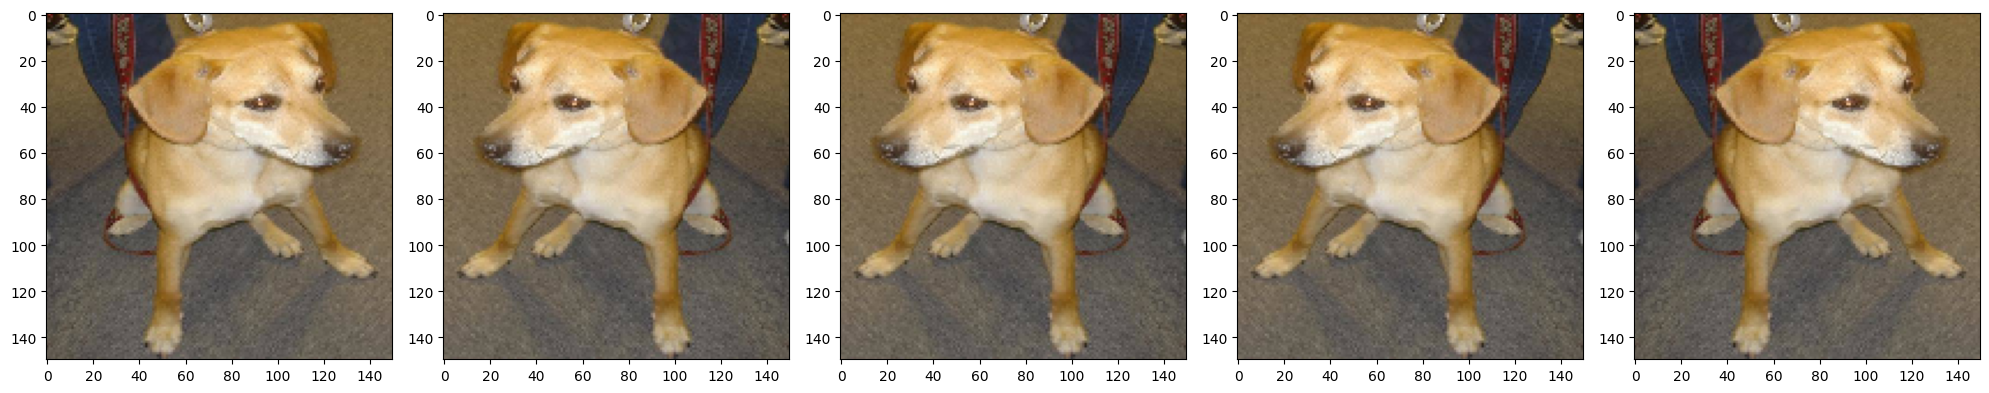

In [33]:
# visualising the flip
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plot_images(augmented_images)

In [34]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(image_size, image_size),
                                               class_mode='binary')

Found 2000 images belonging to 2 classes.


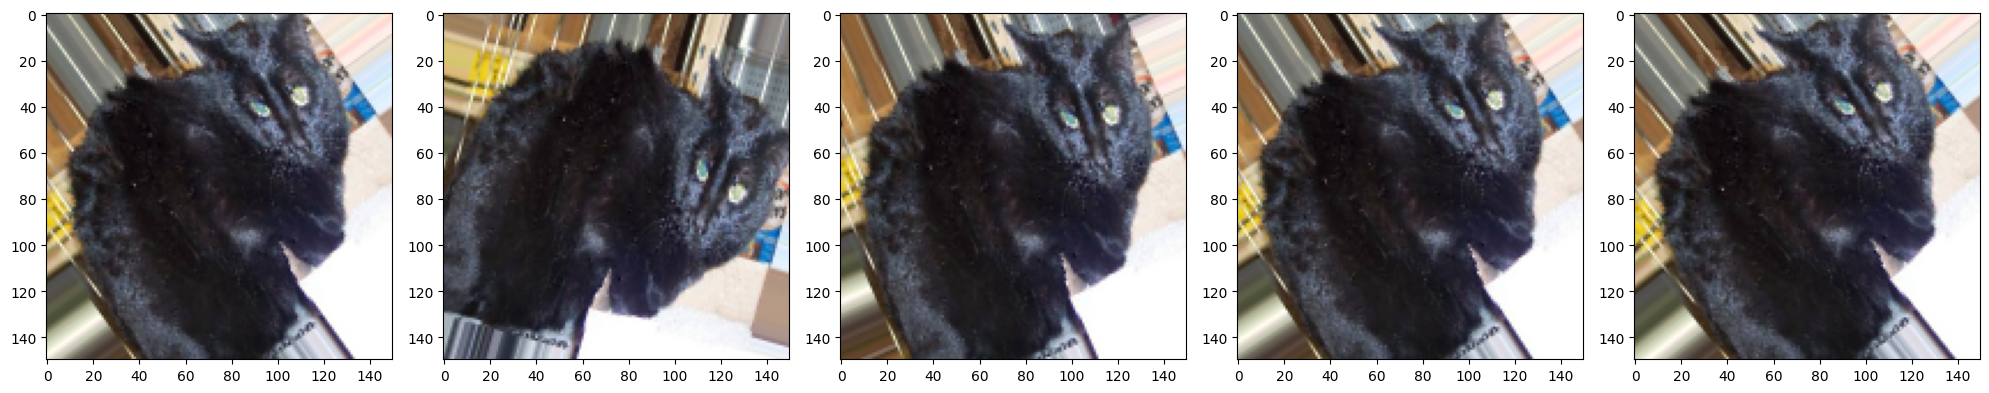

In [35]:
# visualising the flip
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plot_images(augmented_images)

In [36]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(image_size, image_size),
                                               class_mode='binary')

Found 2000 images belonging to 2 classes.


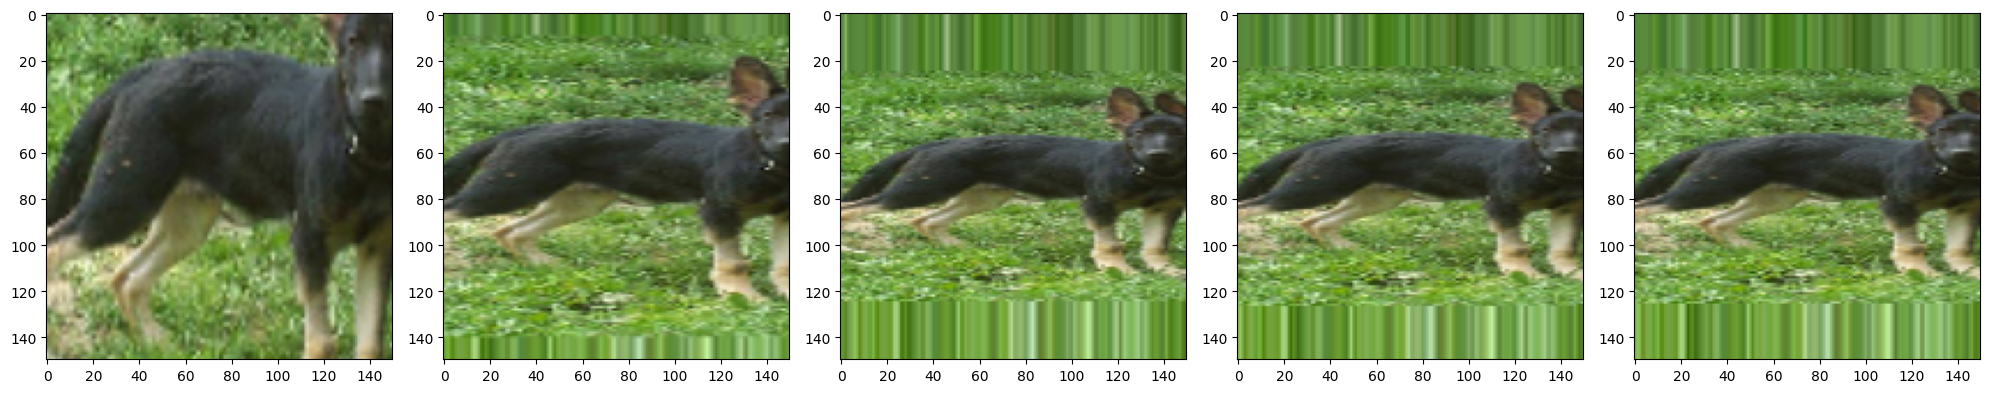

In [37]:
# visualising the flip
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plot_images(augmented_images)

In [38]:
# Puting it all together
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
)


In [39]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(image_size, image_size),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


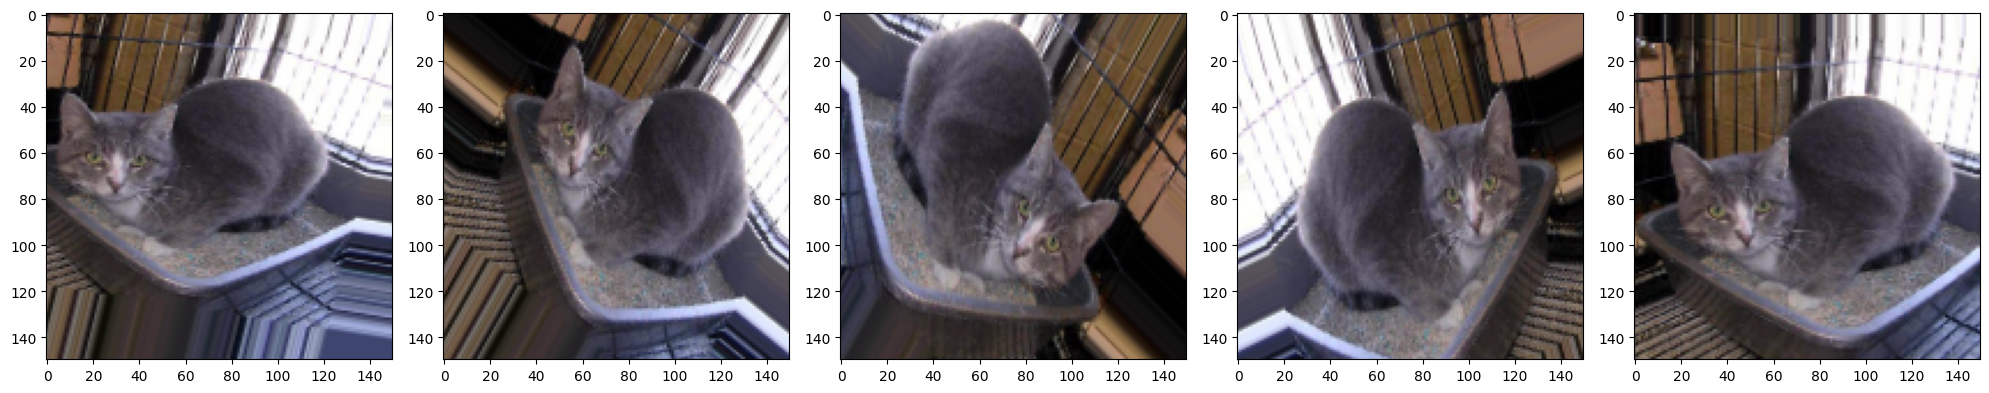

In [40]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plot_images(augmented_images)

In [41]:
image_gen_val = ImageDataGenerator(rescale=1./255)
validation_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                   directory=validation_dir,
                                                   target_size=(image_size, image_size),
                                                   class_mode='binary')

Found 1000 images belonging to 2 classes.


Model Building

In [42]:
# model defination
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), input_shape=(150, 150, 3)))
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Conv2D(64, (3,3)))
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Conv2D(128, (3,3)))
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Conv2D(128, (3,3)))
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(2))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,634 (13.17 MB)

 Trainable params: 3,453,634 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
# fiting the model
epochs = 50
history = model.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(batch_size))),
    epochs=epochs,
    validation_data=validation_data_gen)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 522ms/step - accuracy: 0.5671 - loss: 0.6868 - val_accuracy: 0.5910 - val_loss: 0.6637
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5910 - val_loss: 0.6637
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 526ms/step - accuracy: 0.5908 - loss: 0.6671 - val_accuracy: 0.5120 - val_loss: 0.6853
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5120 - val_loss: 0.6853
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 531ms/step - accuracy: 0.5643 - loss: 0.6798 - val_accuracy: 0.6000 - val_loss: 0.6509
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6000 - val_loss: 0.6509
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 585ms/step - accuracy: 0.6131 - loss: 0.6530 - val_accuracy: 0.6270 - val_loss: 0.6376
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.0000e+00 - lo

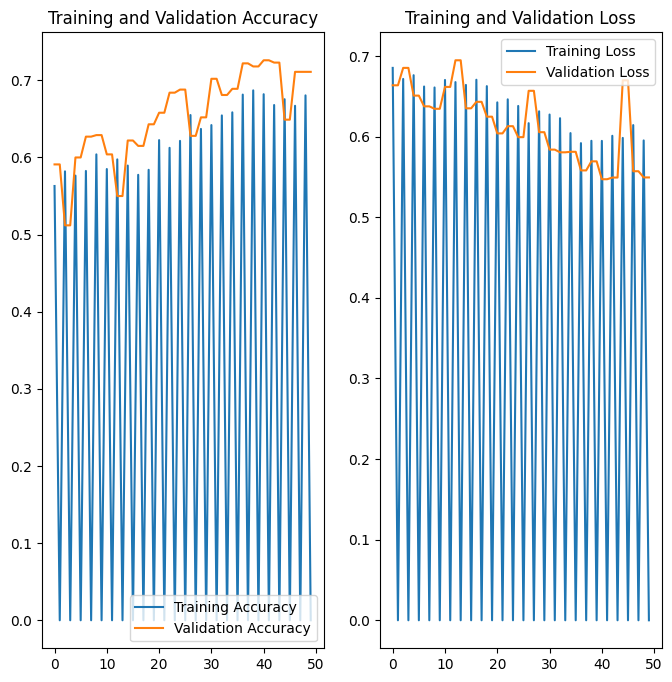

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()